# **Fraud Detection with Supervised Learning**

## **Objective**
The primary objective of this project is to develop a fraud detection system using supervised learning techniques. The system will detect potentially fraudulent credit card transactions and serve as a foundational baseline model for future enhancements with advanced techniques like deep learning.

## **Problem Statement**
Credit card fraud is a significant issue faced by financial institutions worldwide. With the growing volume of transactions, detecting fraudulent activities in real-time is critical. Building an efficient fraud detection system can help minimise losses and protect customers from fraudulent charges. The challenge lies in identifying fraudulent transactions from vast amounts of data while maintaining low false positives and high detection rates.

## **Key Steps in the Project**

1. **Import Libararies and Data Collection**: 
   - Load the dataset containing historical credit card transactions, ensuring it is correctly imported into the environment and prepared for analysis by addressing any file format or loading issues.

2. **Data Exploration and Preprocessing**: 
   - Perform detailed exploratory data analysis (EDA) to investigate the distributions of various features, detect potential outliers, handle missing values and gain insights into patterns or relationships between variables relevant to fraud detection, while also addressing the class imbalance in fraudulent and non-fraudulent transactions.

3. **Feature Engineering and Selection**: 
   - Identify and create relevant features that could enhance model performance, while also reducing dimensionality through feature selection techniques to eliminate irrelevant or redundant variables, improving both training efficiency and model accuracy.

4. **Model Selection and Training**: 
   - Select and apply appropriate supervised learning models which is the **Random Forest Random Forest Classifier** train them on the preprocessed dataset, utilising cross-validation and hyperparameter tuning techniques to ensure robust model performance and avoid overfitting. 

5. **Model Evaluation**: 
   - Use performance metrics like accuracy, precision, recall, F1-score and ROC-AUC to thoroughly evaluate model performance, with a special focus on handling false positives and false negatives, while also analysing confusion matrices to further refine detection strategies.

6. **Deployment**: 
   - Develop and deploy a web-based fraud detection system using **Flask**, integrating the trained model to detect fraudulent transactions in real-time and providing a user-friendly interface for inputting new transaction data and receiving predictions.

7. **Documentation**: 
   - Prepare comprehensive documentation detailing each phase of the project, including data preprocessing steps, feature engineering, model selection criteria, training methods, performance evaluation results and the deployment process to ensure reproducibility and clarity.


### **Step 1: Import Libraries and Data Collection**

In [14]:
# -------------------------- Import Libraries --------------------------

# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
)
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Advanced libraries for imbalanced datasets and boosting
from imblearn.over_sampling import SMOTE

# Set up warnings filter and seaborn style
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Optional: Adjust default figure size for plots
plt.rcParams['figure.figsize'] = [10, 6]

In [15]:
# -------------------------- Load Dataset --------------------------
# Load the dataset 
data = pd.read_csv(r"C:\Users\USER\Downloads\Fraud-Detection-with-Supervised-Learning\creditcard.csv")

# Display the first few rows of the dataset
print("Dataset loaded successfully.")
print(data.head())

# Display general information about the dataset (data types, non-null values, etc.)
print(data.info())

# Display basic statistics of the numerical features
print(data.describe())

Dataset loaded successfully.
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

### **Step 2: Data Exploration and Preprocessing**

In [16]:
# 1. Check for missing values and print the summary
missing_values = data.isnull().sum()
print("Missing Values in Each Feature:\n", missing_values[missing_values > 0])

# 2. Print the distribution of fraudulent vs non-fraudulent transactions
class_distribution = data['Class'].value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(f"Non-Fraudulent Transactions (0): {class_distribution[0]:.2f}%")
print(f"Fraudulent Transactions (1): {class_distribution[1]:.2f}%")

# 3. Print basic statistics of the 'Amount' feature
amount_stats = data['Amount'].describe()
print("\nStatistics for Transaction Amounts:")
print(amount_stats)

# 4. Print the overall data shape and information
print("\nData Shape:", data.shape)
print("\nData Information:")
print(data.info())

# 5. Print correlation information for selected features
corr_values = data.corr()
high_correlation = corr_values[corr_values['Class'].abs() > 0.2].index.tolist()
print("\nFeatures Highly Correlated with Class (|Correlation| > 0.2):", high_correlation)

# 6. Print outlier information for the 'Amount' feature
outliers = data[data['Amount'] > amount_stats['75%'] + 1.5 * (amount_stats['75%'] - amount_stats['25%'])]
print("\nNumber of Outliers in 'Amount' Feature:", outliers.shape[0])
print("Outlier Statistics:\n", outliers['Amount'].describe())

# 7. Print insights on transaction time distribution
print("\nUnique Transaction Times:", data['Time'].nunique())
print("Range of Transaction Times: Min =", data['Time'].min(), "Max =", data['Time'].max())

# 8. Additional insights on the data
print("\nData Types:\n", data.dtypes)
print("\nNumber of Unique Values per Feature:\n", data.nunique())


Missing Values in Each Feature:
 Series([], dtype: int64)

Class Distribution (%):
Non-Fraudulent Transactions (0): 99.83%
Fraudulent Transactions (1): 0.17%

Statistics for Transaction Amounts:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Data Shape: (284807, 31)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      28480

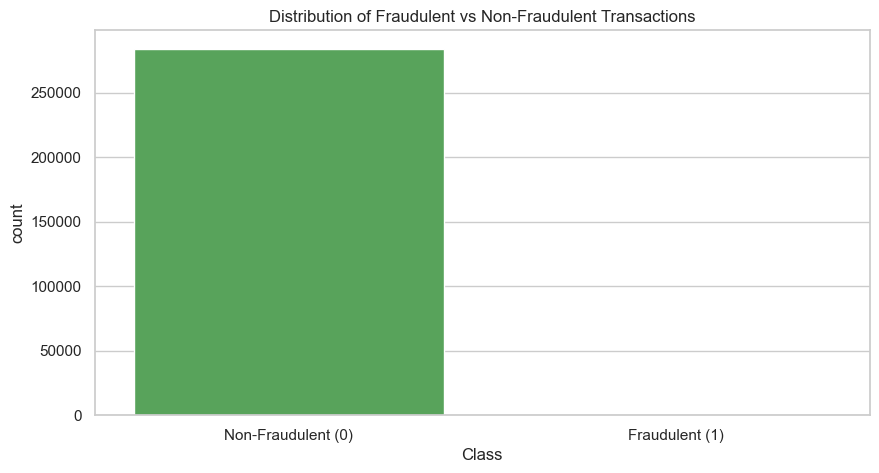

In [17]:
# 1. Distribution of fraudulent vs non-fraudulent transactions
# Fraudulent transactions are indicated by the 'Class' column (1 = fraud, 0 = non-fraud)
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', data=data, palette=['#4CAF50', '#F44336'])
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

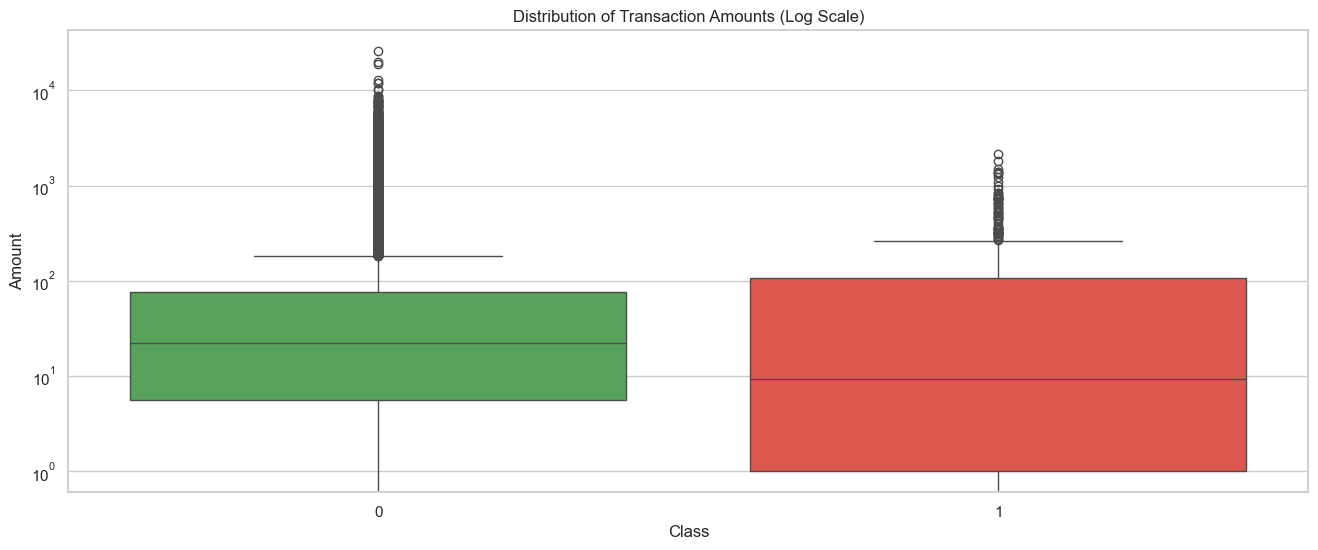

In [18]:
# 2. Distribution of transaction amounts for fraud vs non-fraud
plt.figure(figsize=(16, 6))
sns.boxplot(x='Class', y='Amount', data=data, palette=['#4CAF50', '#F44336'])
plt.yscale('log')  # Log scale to handle skewness
plt.title('Distribution of Transaction Amounts (Log Scale)')
plt.show()

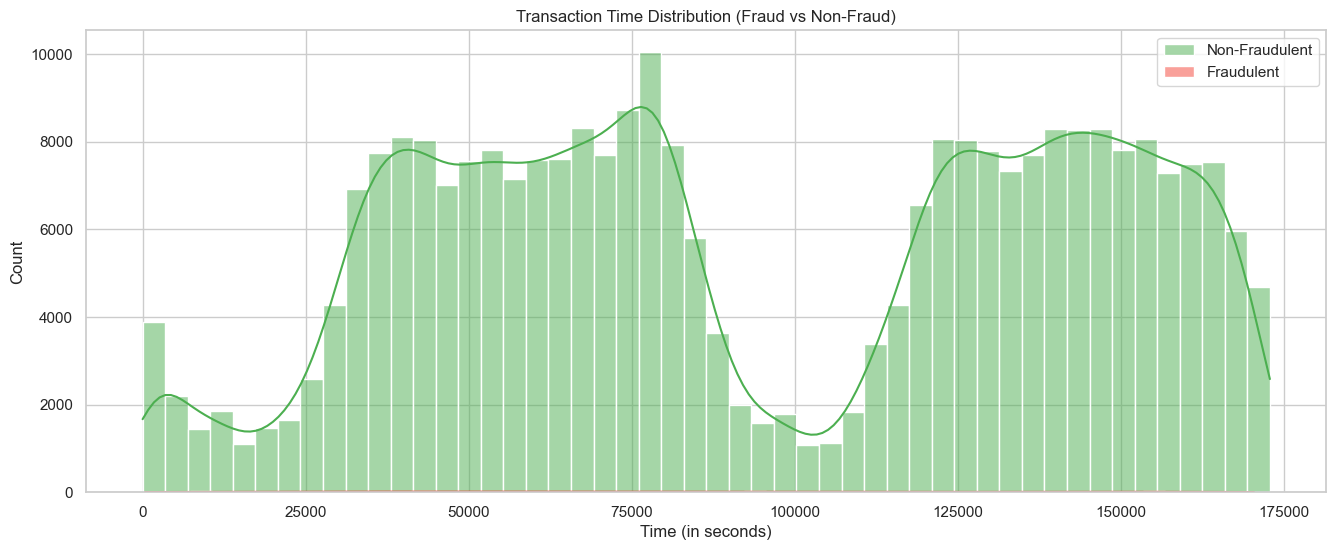

In [19]:
# 4. Time distribution of fraud vs non-fraud transactions
plt.figure(figsize=(16, 6))
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, color='#4CAF50', label='Non-Fraudulent', kde=True)
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='#F44336', label='Fraudulent', kde=True)
plt.title('Transaction Time Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Time (in seconds)')
plt.legend()
plt.show()

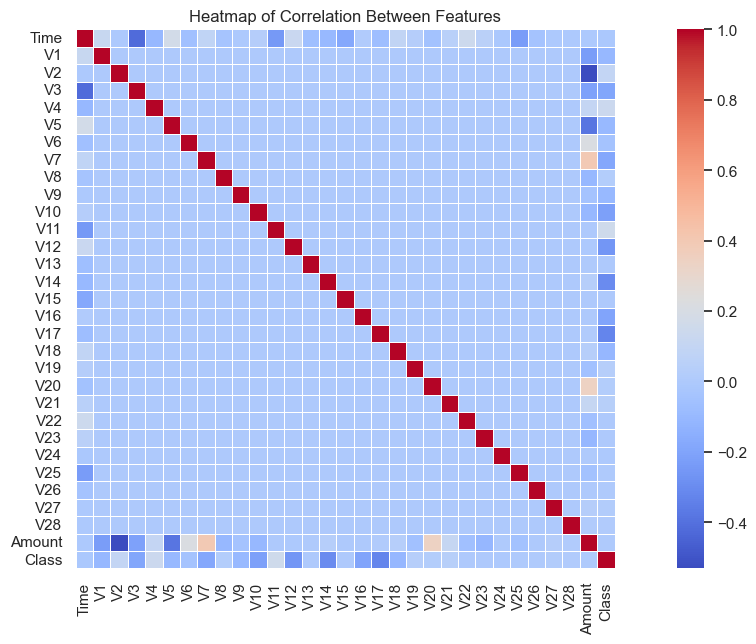

In [20]:
# 5. Correlation heatmap of numerical features
plt.figure(figsize=(16, 7))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Between Features')
plt.show()

### **Step 3: Feature Engineering and Selection**

In [21]:
# -------------------------- Feature Engineering and Selection --------------------------

# 1. **Feature Engineering**
# 1.1 Create new features based on existing ones 
data['Log_Amount'] = np.log(data['Amount'] + 1)  # Log transform to reduce skewness

# 1.2 Create a feature that categorises transactions based on the amount
data['Amount_Category'] = pd.cut(data['Amount'],
                                   bins=[0, 50, 200, 500, 1000, 5000, np.inf],
                                   labels=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme'])

# 2. **Handling Categorical Features**
# Convert categorical features into numerical format 
data = pd.get_dummies(data, columns=['Amount_Category'], drop_first=True)

# 3. **Feature Selection**
# 3.1 Separate features and target variable
X = data.drop(['Class', 'Time', 'Amount'], axis=1)  # Drop the target and original Amount
y = data['Class']

# 3.2 Check for features with low variance and drop them
selector = VarianceThreshold(threshold=0.01)  # Remove features with variance below this threshold
X_reduced = selector.fit_transform(X)

# 3.3 Feature Selection using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_reduced, y)

# Select features based on importance threshold
importances = model.feature_importances_
threshold = np.mean(importances)  # You can adjust the threshold
important_features = X.columns[selector.get_support()][importances > threshold]

# Create the reduced feature set
X_k_best = X_reduced[:, importances > threshold]

# 4. **Print Selected Features and Shape Information**
print("\nSelected Features Based on Importance:\n", important_features)
print("\nShape of Feature Matrix after Engineering and Selection:", X_k_best.shape)


Selected Features Based on Importance:
 Index(['V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')

Shape of Feature Matrix after Engineering and Selection: (284807, 9)


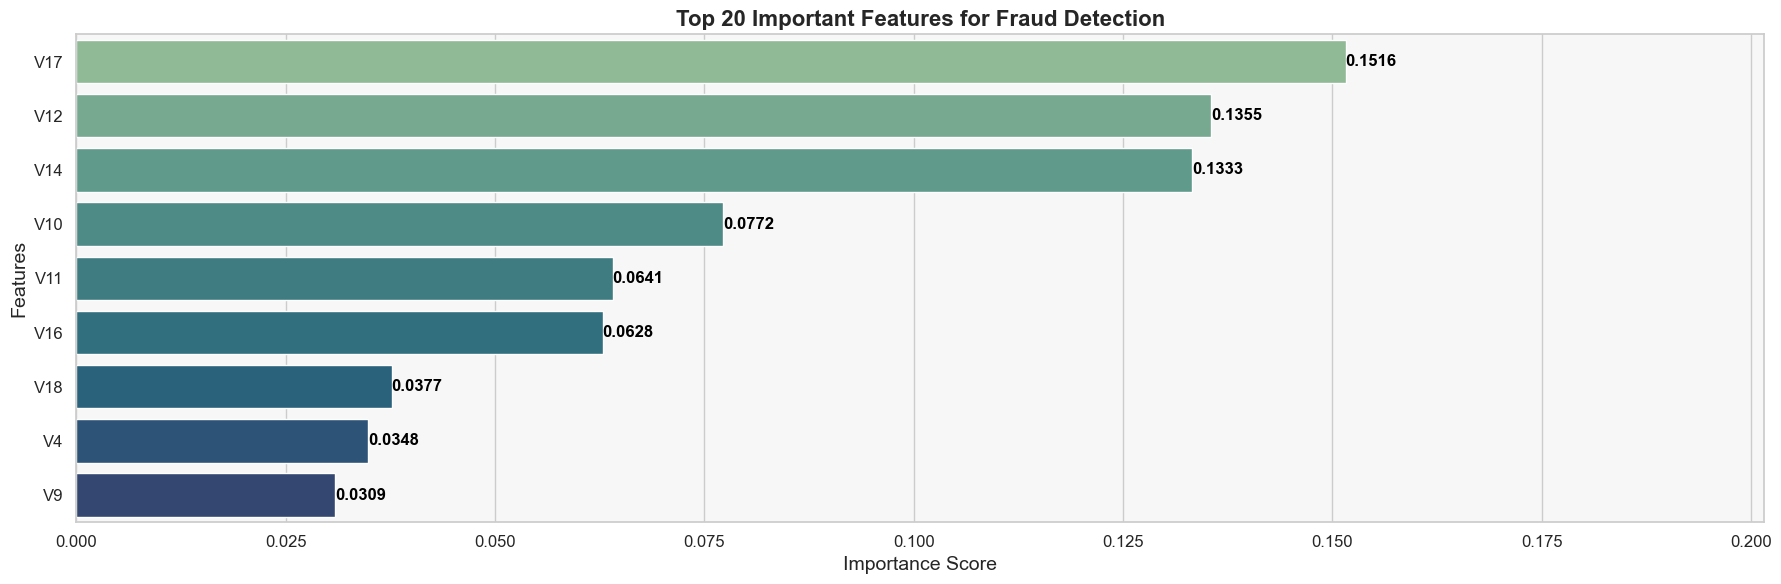

In [25]:
# 5. **Visualise Feature Importance**
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns[selector.get_support()],
                                       'Importance': importances})
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > threshold]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set the style and color palette
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("crest", n_colors=len(feature_importance_df))

# Create a horizontal bar plot
bar_plot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette=palette)

# Add annotations
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.4f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      color='black', ha='left', va='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.title("Top 20 Important Features for Fraud Detection", fontsize=16, fontweight='bold')
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xlim(0, feature_importance_df['Importance'].max() + 0.05)  # Slightly extend the x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a background
plt.gca().set_facecolor('#f7f7f7')

# Show the plot
plt.tight_layout()
plt.show()

### **Step 4: Model Selection and Training**

In [10]:
# ------------------- Data Preparation -------------------

# Define features and target
X = df.drop(['Class'], axis=1)  # Replace 'Class' with your target column name
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ------------------- Model Selection and Training -------------------

# Create a pipeline to standardise the features and apply Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Define hyperparameter grid to search
param_grid = {
    'rf__n_estimators': [50, 100],  # Reduced n_estimators for faster execution
    'rf__max_depth': [None, 10, 20],  # Fewer max_depth options
    'rf__min_samples_split': [2, 5],  # Fewer options to explore
    'rf__min_samples_leaf': [1, 2]  # Fewer options to explore
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

# Predict on the test set
y_pred_rf = best_model.predict(X_test)
y_prob_rf = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

# Output the best model
print(f"Best Model: {best_model}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits


### **Step 5: Model Evaluation**